# CA2 Statistical Techniquesdings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

### Task 1:
Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

1. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.
2. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.
3. Produce and comment on an appropriate plot to illustrate your findings.

#### Data Set Loadingpresent the national mean

In [2]:
df = pd.read_csv("Q1.csv")

In [3]:
df

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43
5,73.16
6,81.30
7,71.37
8,65.35
9,80.05


#### Summary Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


There are 50 records of a float64 variable in the database.

In [5]:
df.isnull().sum()

exam_score    0
dtype: int64

In [6]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


#### Data Description
 - Mean = 68.7356
 - Std  = 9.75
 - Min Value = 48.73
 - Max Value = 87.36

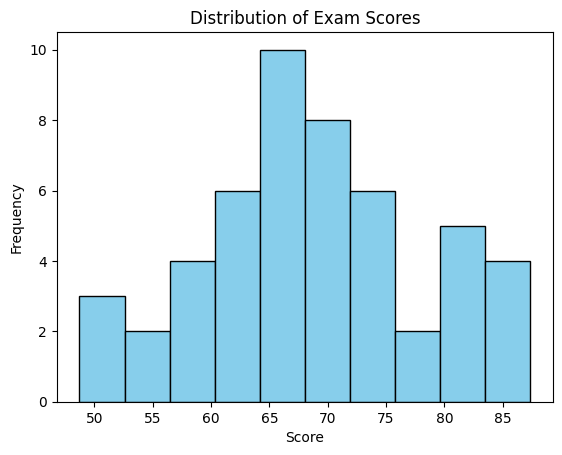

In [7]:
# Creating a histogram to visualize the distribution of scores
plt.hist(df['exam_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

#### Hypothesis Test
To determine if the teacher's concerns are justified, we will perform the hypothesis test:

1. **Hypotheses**:
   - Null Hypothesis (H0): The mean score is equal to or greater than 70%.
   - Alternative Hypothesis (H1): The mean score is less than 70%.

2. **Significance Level (α)**: α = 0.05.

3. **Test Statistic**: We will use the Student's t-test for a sample.

4. **Decision Criterion**: If the calculated p-value is less than the significance level (α = 0.05), we will reject the null hypothesis in favor of the alternative hypothesis.ternativa.

In [8]:
# Defining the national mean
mean_national = 70

# Defining the significance level
alpha = 0.05

In [9]:
# Performing the hypothesis test
t_statistic, p_value = stats.ttest_1samp(df['exam_score'], mean_national)
p_value

0.36364597032062806

### Since the p-value (0.3636) is greater than alpha (0.05), there is not enough evidence to conclude that the average scores are below the national mean of 70%.

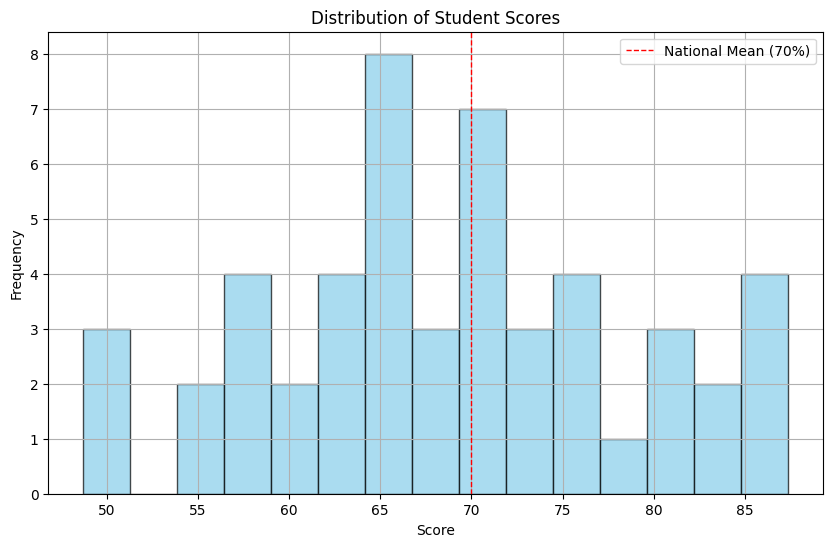

In [10]:
# Creating the histogram
plt.figure(figsize=(10, 6))
plt.hist(df, bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Adding a vertical line to represent the national mean
plt.axvline(mean_national, color='red', linestyle='dashed', linewidth=1, label='National Mean (70%)')

# Adding legends and title
plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


#### Histogram
Histogram of student scores, highlighting the national mean of 70%.

- The histogram shows the distribution of student scores, highlighting the concentration of scores along the horizontal axis.
- The dashed vertical line in red represents the national mean of 70%, aiding in visualizing the student scores and positioning relative to the national mean.
- It is observed that the majority of scores are below the national mean.
- The distribution of scores appears to be skewed to the left, suggesting that most students achieved lower scores.

### Task 2
Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

1. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.
2. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
3. Produce and comment on an appropriate plot to illustrate your findings.
4. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamnds.


In [11]:
df = pd.read_csv("diamonds.csv")

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Variable colourless

In [13]:
# Create the new binary variable "uncolored"
df['colourless'] = df['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

df

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0


#### Hypothesis Test

The chi-square test of independence allows evaluating the association between diamond clarity (categorical variable) and whether it is colorless or not (another categorical variable).

1. **Hypotheses**:
   - Null Hypothesis (H0): There is no association between diamond clarity and whether it is colorless or not.
   - Alternative Hypothesis (H1): There is an association between diamond clarity and whether it is colorless or not.

2. **Statistical Test**: The chi-square test of independence is used to check for an association between two categorical variables.

3. **Construction of the Contingency Table**: The contingency table is a table that shows the frequency of observations for different categories of two categorical variables. The categories are diamond clarity and whether it is colorless or not.

4. **Calculating the Chi-Square and p-Value**: The chi-square test calculates a chi-square statistic based on the contingency table. It then calculates the p-value, which indicates the probability of observing the data under the null hypothesis.

In [14]:
# Contingency table between the variables "clarity" and "colorless"
contingency_table = pd.crosstab(df['clarity'], df['colourless'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Define the significance level
alpha = 0.01

p_value 

6.481587124454714e-101

#### The p-value (6.481 x 10 ^-101) is less than alpha (0.01) therefore there is a significant association between diamond clarity and whether it is colorless or not.

#### Grafic

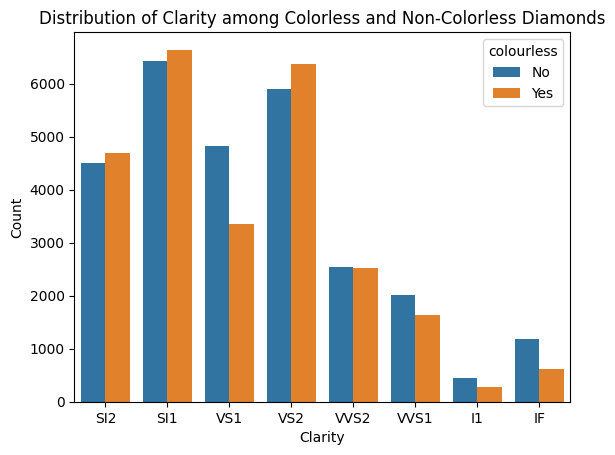

In [15]:
# Create the bar chart
sns.countplot(x='clarity', hue='colourless', data=df)
plt.title('Distribution of Clarity among Colorless and Non-Colorless Diamonds')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.legend(title='colourless', labels=['No', 'Yes'])
plt.show()

#### 90% Confidence Interval for the Mean Price of Colorless and Non-Colorless Diamonds

In [16]:
# Filter the colorless and non-colorless diamonds
diamonds_incolores = df[df['colourless'] == 1]
diamonds_nao_incolores = df[df['colourless'] == 0]

# Calculate the 90% confidence interval for the mean price of colorless diamonds
ci_incolores = stats.norm.interval(0.90, loc=diamonds_incolores['price'].mean(), scale=diamonds_incolores['price'].std())

# Calculate the 90% confidence interval for the mean price of non-colorless diamonds
ci_nao_incolores = stats.norm.interval(0.90, loc=diamonds_nao_incolores['price'].mean(), scale=diamonds_nao_incolores['price'].std())

print("90% Confidence Interval for the Mean Price of Colorless Diamonds:", ci_incolores)
print("90% Confidence Interval for the Mean Price of Non-Colorless Diamonds:", ci_nao_incolores)

90% Confidence Interval for the Mean Price of Colorless Diamonds: (-2463.717221271203, 9139.23602344628)
90% Confidence Interval for the Mean Price of Non-Colorless Diamonds: (-2590.0069402730096, 11572.467085460961)


#### The 90% confidence intervals provide an estimated range where the mean price of colorless and non-colorless diamonds is likely to be.